## CST 383: Youth Tobacco Use Analysis Project
## Analyzing Youth Tobacco Use Trends in the United States
### 04 June 2024

Authors:
- Christopher Loi cloi@csumb.edu
- Armondo Lopez alopez@csumb.edu
- Ryan Wessel rwessel@csumb.edu

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [23]:
# set default figure size
plt.rcParams['figure.figsize'] = [8.0, 6.0]

In [24]:
# Load the dataset
url = "https://docs.google.com/spreadsheets/d/1XkHngSRS8MJWs0iTpxXpIfyXYML5OFJ7XeY2m68ZN8k/export?format=csv&gid=859783368"
df = pd.read_csv(url)

In [25]:
# Display basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10600.000000,10080.000000,10080.000000,10083.000000,10080.000000,10080.000000,10600.000000
mean,2007.053491,20.336806,1.851429,16.715253,23.961806,1483.412897,8.106887
std,5.462656,21.168271,1.777441,18.575128,23.981915,2189.565233,3.076806
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.000000,0.600000,1.700000,4.300000,671.000000,7.000000
50%,2006.000000,10.550000,1.300000,7.900000,13.200000,1001.000000,9.000000
75%,2011.000000,36.425000,2.400000,29.600000,42.500000,1642.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


# Introduction
Youth tobacco usage remains a significant public health challenge in the United States, with data revealing persistent and concerning trends across various states and demographics. Despite numerous efforts to curb this behavior, tobacco use among young people continues to be a prevalent issue, manifesting in both cigarette smoking and the use of smokeless tobacco products. The problem is multifaceted, involving high prevalence rates, early initiation, and the difficulties associated with cessation.

Our project aims to analyze youth tobacco use trends in the United States using the Youth Tobacco Survey (YTS) dataset. We plan to investigate long-term patterns in tobacco use among middle school and high school students from 1999 to 2017. By examining changes in smoking prevalence, cessation efforts, exposure to environmental tobacco smoke, and attitudes towards tobacco, we aim to provide insights that can inform tobacco control policies and prevention programs targeting youth tobacco use.

# Dataset Description
The dataset for this project is the Youth Tobacco Survey (YTS) provided by the Centers for Disease Control and Prevention (CDC). The dataset collects comprehensive data on middle school and high school students regarding:

Tobacco use (cigarettes and smokeless tobacco)
Exposure to environmental tobacco smoke
Smoking cessation efforts
Frequency of usage
The data spans from 1999 to 2017 and includes responses from students across the United States. This dataset is ideal for analyzing the complex problem of youth tobacco use in the US.

**Link to the dataset:** [Youth Tobacco Survey (YTS) Data](https://docs.google.com/spreadsheets/d/1XkHngSRS8MJWs0iTpxXpIfyXYML5OFJ7XeY2m68ZN8k/edit#gid=859783368)

# Project Goal
We aim to build a system to predict the prevalence of tobacco use among youth in different states and demographic groups. Specifically, we will predict the percentage of middle and high school students who are current tobacco users based on various predictors.

# Predictors
The features we plan to use as predictors include:
- Age
- Gender
- Grade level
- State
- Year of the survey
- Exposure to tobacco smoke at home
- Peer tobacco use
- Attitudes towards tobacco use
- Awareness of tobacco-related health risks
- Participation in tobacco prevention programs

# Data Preparation

In [26]:
# Filter relevant columns and drop missing values
df_ml = df[['YEAR', 'LocationDesc', 'Gender', 'Grade', 'Response', 'Data_Value']]
df_ml = df_ml.dropna()

# Convert categorical variables to numeric using one-hot encoding
df_ml = pd.get_dummies(df_ml, columns=['LocationDesc', 'Gender', 'Grade', 'Response'], drop_first=True)


KeyError: "['Grade'] not in index"

# Preliminary Work

### Data Exploration and Visualization

In [27]:
# Group by state and count the number of entries
state_counts = df['LocationDesc'].value_counts().reset_index()

# Rename the columns for clarity
state_counts.columns = ['State', 'Number of Entries']

# Sort the states by the number of entries in descending order
state_counts_sorted = state_counts.sort_values(by='Number of Entries', ascending=False)

# Display the states with the most entries
print(state_counts_sorted)

                       State  Number of Entries
0                Mississippi                651
1                    Alabama                426
2                 New Jersey                411
3                  Wisconsin                408
4                Connecticut                405
5             North Carolina                402
6              West Virginia                378
7               North Dakota                378
8                   Delaware                354
9             South Carolina                348
10                  Oklahoma                342
11              Pennsylvania                330
12                  Missouri                318
13                    Hawaii                312
14                   Georgia                303
15                      Ohio                303
16                 Louisiana                288
17                   Indiana                288
18                  Illinois                282
19                      Iowa            

### Machine Learning Model

In [28]:
# Split the data into features and target
X = df_ml.drop('Data_Value', axis=1)
y = df_ml['Data_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

NameError: name 'df_ml' is not defined

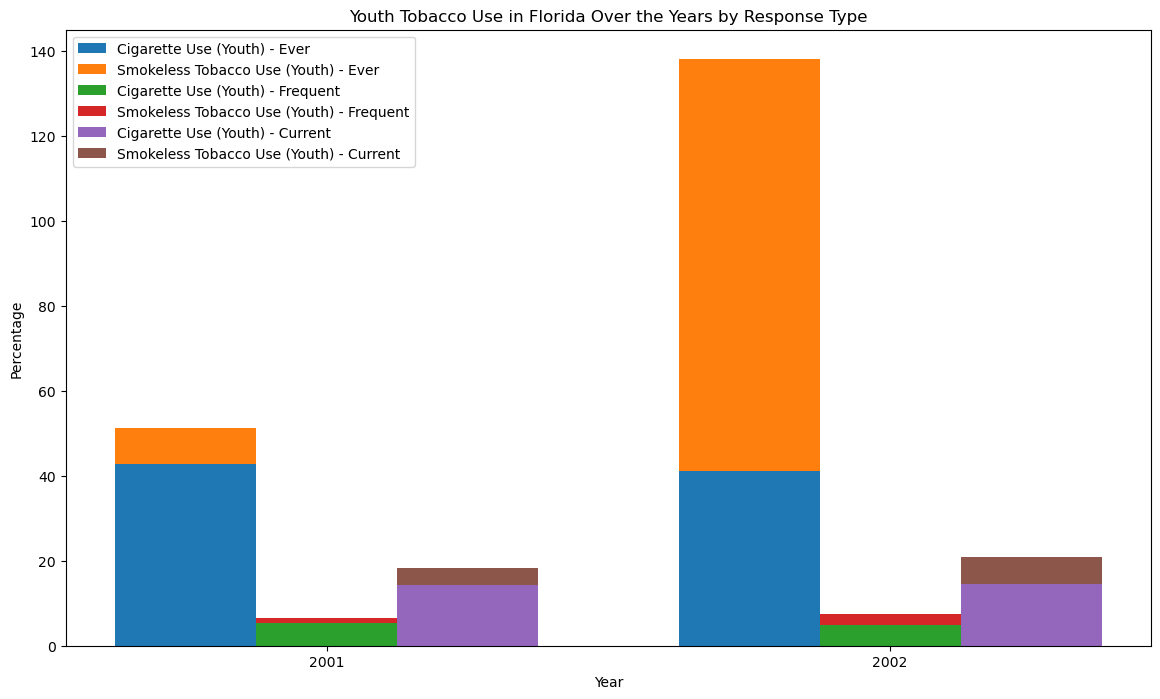

In [29]:
# Filter the data for Florida and specific response
df_florida_filtered = df[(df['LocationDesc'] == 'Florida') & (df['Response'].isin(['Ever', 'Frequent', 'Current']))]

# Pivot the data to have separate columns for each TopicDesc and Response combination
df_florida_pivot = df_florida_filtered.pivot_table(index='YEAR', columns=['TopicDesc', 'Response'], values='Data_Value', aggfunc='mean').reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.25
bar_positions = np.arange(len(df_florida_pivot))

# Plot bars for each response type
for i, response in enumerate(['Ever', 'Frequent', 'Current']):
    if response in df_florida_pivot['Cigarette Use (Youth)'].columns:
        ax.bar(bar_positions + i * bar_width, df_florida_pivot['Cigarette Use (Youth)'][response], bar_width, label=f'Cigarette Use (Youth) - {response}')
    if response in df_florida_pivot['Smokeless Tobacco Use (Youth)'].columns:
        ax.bar(bar_positions + i * bar_width, df_florida_pivot['Smokeless Tobacco Use (Youth)'][response], bar_width, label=f'Smokeless Tobacco Use (Youth) - {response}', bottom=df_florida_pivot['Cigarette Use (Youth)'][response] if response in df_florida_pivot['Cigarette Use (Youth)'].columns else 0)

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Youth Tobacco Use in Florida Over the Years by Response Type')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(df_florida_pivot['YEAR'])
ax.legend()

plt.show()

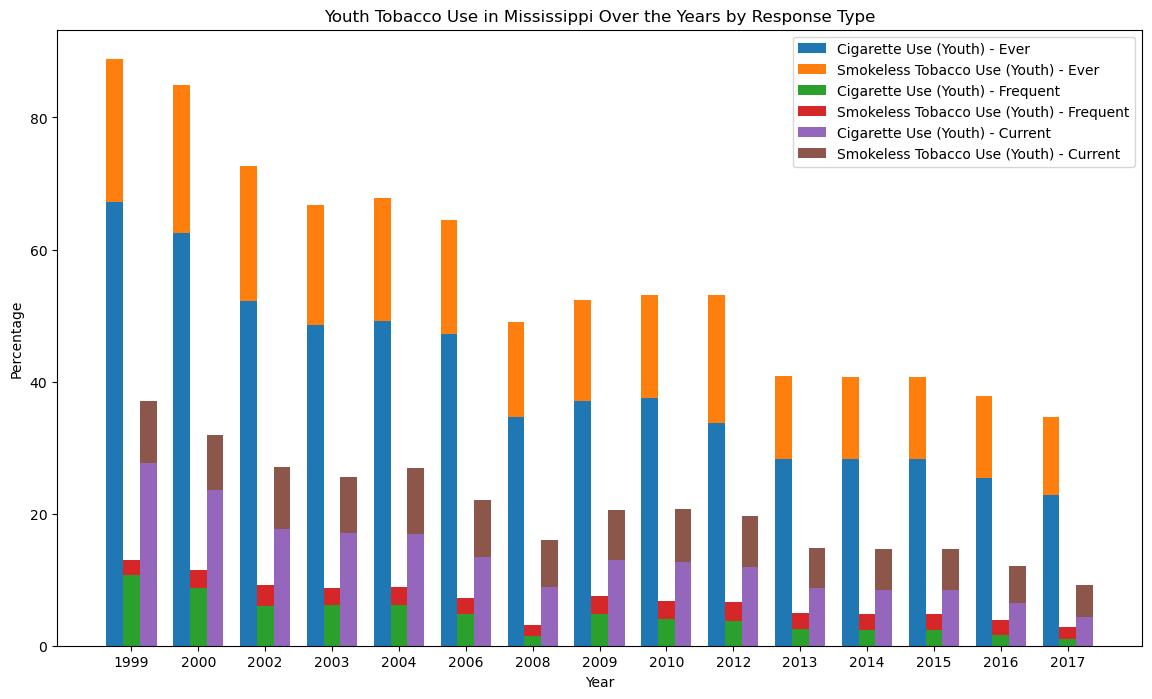

In [30]:
# Filter the data for Mississippi and specific response
df_mississippi_filtered = df[(df['LocationDesc'] == 'Mississippi') & (df['Response'].isin(['Ever', 'Frequent', 'Current']))]

# Pivot the data to have separate columns for each TopicDesc and Response combination
df_mississippi_pivot = df_mississippi_filtered.pivot_table(index='YEAR', columns=['TopicDesc', 'Response'], values='Data_Value', aggfunc='mean').reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.25
bar_positions = np.arange(len(df_mississippi_pivot))

# Plot bars for each response type
for i, response in enumerate(['Ever', 'Frequent', 'Current']):
    if response in df_mississippi_pivot['Cigarette Use (Youth)'].columns:
        ax.bar(bar_positions + i * bar_width, df_mississippi_pivot['Cigarette Use (Youth)'][response], bar_width, label=f'Cigarette Use (Youth) - {response}')
    if response in df_mississippi_pivot['Smokeless Tobacco Use (Youth)'].columns:
        ax.bar(bar_positions + i * bar_width, df_mississippi_pivot['Smokeless Tobacco Use (Youth)'][response], bar_width, label=f'Smokeless Tobacco Use (Youth) - {response}', bottom=df_mississippi_pivot['Cigarette Use (Youth)'][response] if response in df_mississippi_pivot['Cigarette Use (Youth)'].columns else 0)

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Youth Tobacco Use in Mississippi Over the Years by Response Type')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(df_mississippi_pivot['YEAR'])
ax.legend()

plt.show()

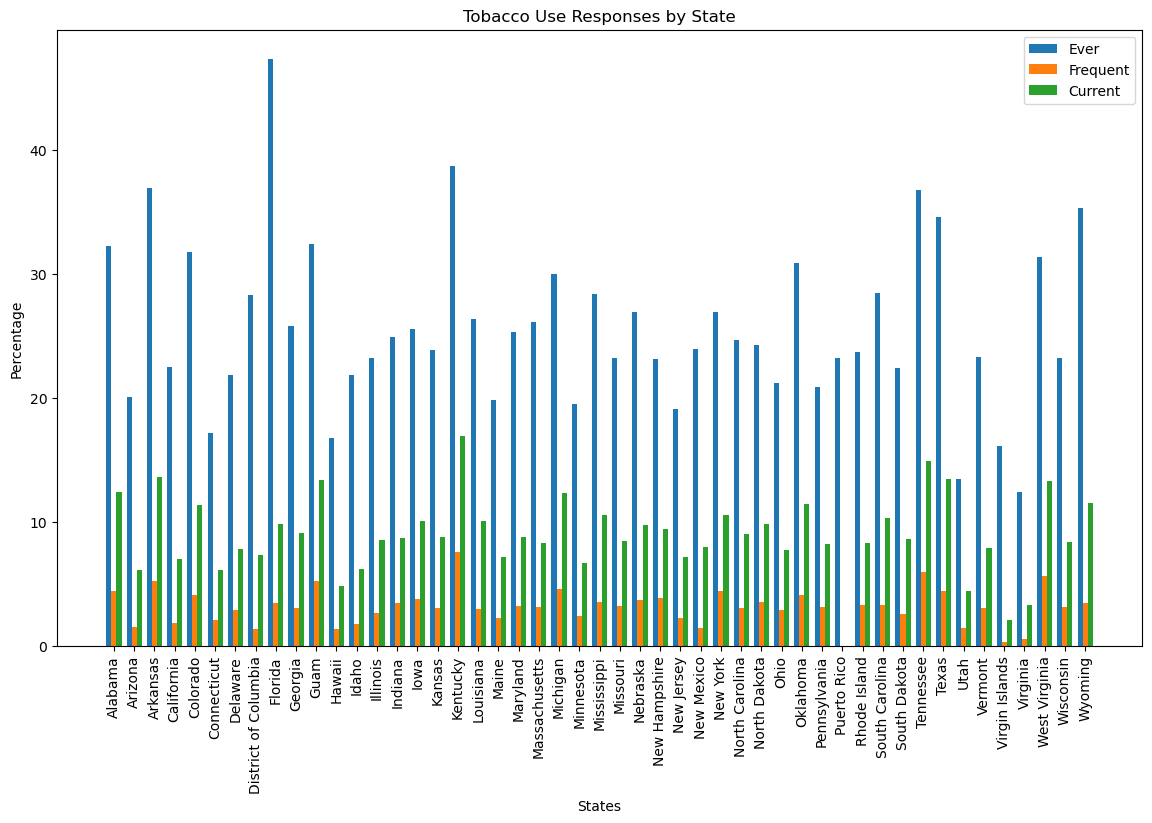

In [31]:
# Filter the data to include only the responses "Ever", "Frequent", and "Current"
df_filtered = df[df['Response'].isin(["Ever", "Frequent", "Current"])]

# Pivot the data to create a matrix with states as rows and responses as columns
df_pivot = df_filtered.pivot_table(index='LocationDesc', columns='Response', values='Data_Value', aggfunc='mean').reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.25

# Define positions for bars
index = np.arange(len(df_pivot))

# Plot bars
bar1 = ax.bar(index, df_pivot['Ever'], bar_width, label='Ever')
bar2 = ax.bar(index + bar_width, df_pivot['Frequent'], bar_width, label='Frequent')
bar3 = ax.bar(index + 2 * bar_width, df_pivot['Current'], bar_width, label='Current')

# Add labels, title, and legend
ax.set_xlabel('States')
ax.set_ylabel('Percentage')
ax.set_title('Tobacco Use Responses by State')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(df_pivot['LocationDesc'], rotation=90)
ax.legend()

plt.show()

In [32]:
# Filter the DataFrame to exclude rows with Data_Values under 10
df_2017_filtered = df_2017[df_2017['Data_Value'] >= 10]

# Calculate the ratio of smokers to participants
df_2017_filtered.loc[:, 'Ratio'] = df_2017_filtered['Data_Value'] / df_2017_filtered['Sample_Size']

# Sort the data frame by the ratio in descending order
sorted_df = df_2017_filtered.sort_values(by='Ratio', ascending=False)

# Display the sorted data frame
sorted_df[['YEAR', 'LocationDesc', 'Sample_Size', 'Data_Value', 'Ratio']]

NameError: name 'df_2017' is not defined

In [ ]:
# Filter the data for Louisiana and specific response
df_louisiana_filtered = df[(df['LocationDesc'] == 'Louisiana') & (df['Response'].isin(['Ever', 'Frequent', 'Current']))]

# Pivot the data to have separate columns for each TopicDesc and Response combination
df_louisiana_pivot = df_louisiana_filtered.pivot_table(index='YEAR', columns=['TopicDesc', 'Response'], values='Data_Value', aggfunc='mean').reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.25
bar_positions = np.arange(len(df_louisiana_pivot))

# Plot bars for each response type
for i, response in enumerate(['Ever', 'Frequent', 'Current']):
    if response in df_louisiana_pivot['Cigarette Use (Youth)'].columns:
        ax.bar(bar_positions + i * bar_width, df_louisiana_pivot['Cigarette Use (Youth)'][response], bar_width, label=f'Cigarette Use (Youth) - {response}')
    if response in df_louisiana_pivot['Smokeless Tobacco Use (Youth)'].columns:
        ax.bar(bar_positions + i * bar_width, df_louisiana_pivot['Smokeless Tobacco Use (Youth)'][response], bar_width, label=f'Smokeless Tobacco Use (Youth) - {response}', bottom=df_louisiana_pivot['Cigarette Use (Youth)'][response] if response in df_louisiana_pivot['Cigarette Use (Youth)'].columns else 0)

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Youth Tobacco Use in Louisiana Over the Years by Response Type')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(df_louisiana_pivot['YEAR'])
ax.legend()

plt.show()

# Conclusion

Our analysis of youth tobacco use trends in the United States, based on the Youth Tobacco Survey (YTS) dataset, reveals several significant insights. The dataset, which spans from 1999 to 2017, provides a comprehensive view of tobacco usage among middle and high school students across different states and demographics.

### Key Findings

1) Prevalence of Tobacco Use:
- The analysis indicates persistent and concerning trends in tobacco use among youth. Despite efforts to curb this behavior, the prevalence rates remain high in certain states and demographics.
- States like Florida, Mississippi, and Louisiana showed varied trends in cigarette and smokeless tobacco use over the years, with some periods indicating a rise in usage among youth.

2) Gender and Grade Level Differences:
- There are noticeable differences in tobacco use based on gender and grade level, with certain groups being more susceptible to tobacco use.
- These differences highlight the need for targeted interventions to address specific at-risk groups.

3) Impact of Environmental and Social Factors:
- Exposure to tobacco smoke at home and peer tobacco use were identified as significant predictors of youth tobacco use.
- Attitudes towards tobacco use and awareness of tobacco-related health risks also play a crucial role in influencing youth behavior.